<a href="https://colab.research.google.com/github/IImbryk/ReinforcementLearningTraning/blob/main/Class_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    print(sorted(mp4list))
    mp4 = sorted(mp4list)[len(mp4list)-1]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video2', force=True)
  return env

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (53.0.0)


In [ ]:
import gym
from gym import wrappers
import numpy as np

In [ ]:
env = wrappers.Monitor(gym.make('CartPole-v1'), './video2', force=True)


In [ ]:
np.random.seed(0)

# hyperparameters

n_episode = 50   

In [ ]:
jhjh

In [ ]:
def f(render=False):
    state = env.reset()
    total_reward = 0

    done = False
    while not done:
        action = env.action_space.sample() #get_action(state, w)
        state, reward, done, info = env.step(action)
        total_reward += reward
    return total_reward

In [ ]:
for i in range(2):
    # initialize memory for a population of w's, and their rewards
    total_rewards = []
    for j in range(n_episode):
        total_rewards.append(f())  # evaluate the jittered version

env.close()
#show_video()

In [ ]:
print('Среднее полное вознагрождение в {} эпизодах: {}'.format(
    n_episode, sum(total_rewards) / n_episode))

Среднее полное вознагрождение в 50 эпизодах: 21.86


Reference : [CartPole-v0](https://github.com/openai/gym/wiki/CartPole-v0)

## Реализация  и  оценивание стратегии случайного поиска

In [ ]:
import gym
import torch

env = gym.make('CartPole-v0')


n_episode = 1000

In [ ]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [ ]:
def run_episode(env, weight):
  state = env.reset()
  total_reward = 0
  is_done = False
  
  while not is_done:
    state = torch.from_numpy(state).float()
    action = torch.argmax(torch.matmul(state, weight))
    state, reward, is_done, _ = env.step(action.item())
    total_reward += reward

  return total_reward

In [ ]:
best_total_reward = 0
best_weight = None
total_rewards = []

In [ ]:
for episode in range(n_episode):
  weight = torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  print('Эпизод {}: {}'.format(episode+1,total_reward))
  if total_reward > best_total_reward:
    best_total_reward = total_reward
    best_weight = best_weight
  total_rewards.append(total_reward)
  if best_total_reward == 200:
    break

Эпизод 1: 10.0
Эпизод 2: 8.0
Эпизод 3: 60.0
Эпизод 4: 9.0
Эпизод 5: 9.0
Эпизод 6: 8.0
Эпизод 7: 8.0
Эпизод 8: 9.0
Эпизод 9: 9.0
Эпизод 10: 9.0
Эпизод 11: 9.0
Эпизод 12: 30.0
Эпизод 13: 9.0
Эпизод 14: 13.0
Эпизод 15: 23.0
Эпизод 16: 23.0
Эпизод 17: 200.0


In [ ]:
print('Среднее полное вознагрождение в {} эпизодах: {}'.format(
    n_episode, sum(total_rewards) / n_episode))

Среднее полное вознагрождение в 1000 эпизодах: 0.446


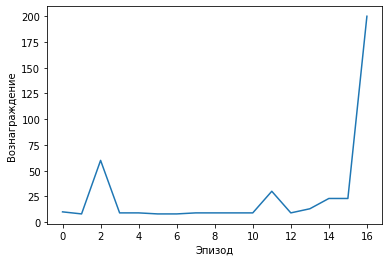

In [ ]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

## Алгоритм  восхождения  на  вершину

In [ ]:
import gym
import torch
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [ ]:
n_episode = 1000
noise_scale = 0.01

best_total_reward = 0
best_weight = torch.rand(n_state, n_action)

total_rewards = []

In [ ]:
for episode in range(n_episode):
  weight = best_weight + noise_scale * torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  if total_reward >= best_total_reward:
    best_total_reward = total_reward
    best_weight = weight 
    noise_scale = max(noise_scale / 2, 1e-4)
  else:
    noise_scale = min(noise_scale * 2, 2)
  total_rewards.append(total_reward)
  print('Эпизод {}: {}'.format(episode + 1, total_reward))

Эпизод 1: 12.0
Эпизод 2: 16.0
Эпизод 3: 24.0
Эпизод 4: 9.0
Эпизод 5: 9.0
Эпизод 6: 9.0
Эпизод 7: 8.0
Эпизод 8: 8.0
Эпизод 9: 18.0
Эпизод 10: 32.0
Эпизод 11: 56.0
Эпизод 12: 37.0
Эпизод 13: 29.0
Эпизод 14: 8.0
Эпизод 15: 200.0
Эпизод 16: 158.0
Эпизод 17: 158.0
Эпизод 18: 52.0
Эпизод 19: 43.0
Эпизод 20: 10.0
Эпизод 21: 78.0
Эпизод 22: 109.0
Эпизод 23: 200.0
Эпизод 24: 200.0
Эпизод 25: 200.0
Эпизод 26: 200.0
Эпизод 27: 200.0
Эпизод 28: 200.0
Эпизод 29: 200.0
Эпизод 30: 200.0
Эпизод 31: 200.0
Эпизод 32: 200.0
Эпизод 33: 200.0
Эпизод 34: 200.0
Эпизод 35: 200.0
Эпизод 36: 200.0
Эпизод 37: 200.0
Эпизод 38: 200.0
Эпизод 39: 200.0
Эпизод 40: 200.0
Эпизод 41: 200.0
Эпизод 42: 200.0
Эпизод 43: 200.0
Эпизод 44: 200.0
Эпизод 45: 200.0
Эпизод 46: 200.0
Эпизод 47: 200.0
Эпизод 48: 200.0
Эпизод 49: 200.0
Эпизод 50: 200.0
Эпизод 51: 200.0
Эпизод 52: 200.0
Эпизод 53: 200.0
Эпизод 54: 200.0
Эпизод 55: 200.0
Эпизод 56: 200.0
Эпизод 57: 200.0
Эпизод 58: 200.0
Эпизод 59: 200.0
Эпизод 60: 200.0
Эпизод 61: 20

In [ ]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(
    n_episode, sum(total_rewards) / n_episode))

Среднее полное вознаграждение в 1000 эпизодах: 196.683


<function matplotlib.pyplot.show>

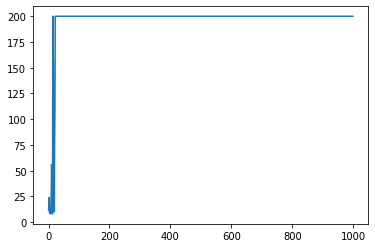

In [ ]:
plt.plot(total_rewards)
plt.show

## Алгоритм  градиента  стратегии

In [ ]:
import gym
import torch
env = gym.make('CartPole-v0')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [ ]:
def run_episode(env, weight):
  state = env.reset()
  grads = []
  total_reward = 0
  is_done = False
  while not is_done:
    state = torch.from_numpy(state).float()
    z = torch.matmul(state, weight)
    probs = torch.nn.Softmax()(z)
    action = int(torch.bernoulli(probs[1]).item())
    d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs #!!!
    d_log = d_softmax[action] / probs[action]
    grad = state.view(-1, 1) * d_log # -1 ~ anything size
    grads.append(grad)

    state,reward, is_done, _ = env.step(action)
    total_reward += reward

    if is_done:
      break
  return total_reward, grads

In [ ]:
n_episode = 1000
learning_rate = 0.001 # скорость обучения
weight = torch.rand(n_state, n_action)

total_rewards = []

In [ ]:
for episode in range(n_episode):
  total_reward, gradients = run_episode(env, weight)
  print('Эпизод {}: {}'.format(episode+1, total_reward))
  for i, gradient in enumerate(gradients):
    weight += learning_rate * gradient * (total_reward - i)
  total_rewards.append(total_reward)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


Эпизод 1: 30.0
Эпизод 2: 39.0
Эпизод 3: 17.0
Эпизод 4: 19.0
Эпизод 5: 27.0
Эпизод 6: 22.0
Эпизод 7: 43.0
Эпизод 8: 16.0
Эпизод 9: 30.0
Эпизод 10: 25.0
Эпизод 11: 16.0
Эпизод 12: 38.0
Эпизод 13: 29.0
Эпизод 14: 11.0
Эпизод 15: 12.0
Эпизод 16: 45.0
Эпизод 17: 69.0
Эпизод 18: 105.0
Эпизод 19: 42.0
Эпизод 20: 54.0
Эпизод 21: 58.0
Эпизод 22: 40.0
Эпизод 23: 85.0
Эпизод 24: 40.0
Эпизод 25: 43.0
Эпизод 26: 45.0
Эпизод 27: 31.0
Эпизод 28: 59.0
Эпизод 29: 38.0
Эпизод 30: 43.0
Эпизод 31: 33.0
Эпизод 32: 23.0
Эпизод 33: 42.0
Эпизод 34: 68.0
Эпизод 35: 39.0
Эпизод 36: 67.0
Эпизод 37: 39.0
Эпизод 38: 47.0
Эпизод 39: 43.0
Эпизод 40: 80.0
Эпизод 41: 43.0
Эпизод 42: 31.0
Эпизод 43: 25.0
Эпизод 44: 28.0
Эпизод 45: 41.0
Эпизод 46: 64.0
Эпизод 47: 66.0
Эпизод 48: 33.0
Эпизод 49: 125.0
Эпизод 50: 24.0
Эпизод 51: 60.0
Эпизод 52: 53.0
Эпизод 53: 51.0
Эпизод 54: 99.0
Эпизод 55: 45.0
Эпизод 56: 52.0
Эпизод 57: 44.0
Эпизод 58: 55.0
Эпизод 59: 52.0
Эпизод 60: 67.0
Эпизод 61: 74.0
Эпизод 62: 58.0
Эпизод 63: 28.0

<function matplotlib.pyplot.show>

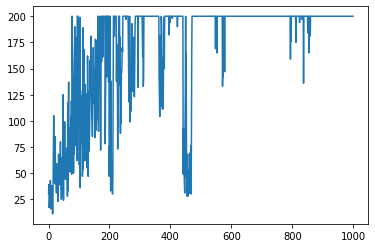

In [ ]:
plt.plot(total_rewards)
plt.show